[182900, 193365]
class    0
dtype: int64
[182900, 193365]
class    0
dtype: int64
0.6939552625632983
[[49439 23574]
 [22479 54986]]
[0.68743569 0.69992363]


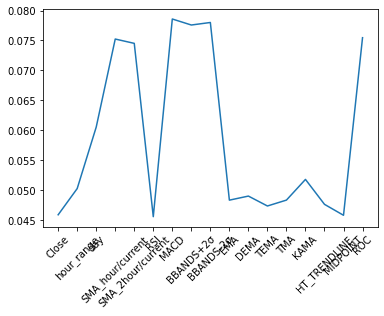

<Figure size 720x720 with 0 Axes>

[0.04589242 0.05026973 0.06053765 0.07524373 0.07452122 0.04557621
 0.07858973 0.07758601 0.0780075  0.04833648 0.0490164  0.0473605
 0.0483454  0.05180024 0.04763754 0.04580946 0.07546978]


In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')

    
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    
    
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame(columns=[ 
        "Close",
        "hour_range",
#         "January","February","March","April","May","June",
#         "July","August","September","October","November","December",
        "day",
#         "Sunday","Monday","Thuesday","Wednesday","Thursday","Friday","Saturday",
        "SMA_hour/current",
        "SMA_2hour/current",
        "RSI",
        "MACD",
        "BBANDS+2σ",
        "BBANDS-2σ"#,
#         "10m_rate",
#         "20m_rate",
#         "30m_rate",
#         "40m_rate",
#         "50m_rate",
#         "60m_rate",
#         "70m_rate",
#         "80m_rate",
#         "90m_rate",
#         "100m_rate",
#         "110m_rate",
#         "120m_rate",
#         "130m_rate",
#         "140m_rate",
#         "150m_rate",
#         "160m_rate",
#         "170m_rate",
#         "180m_rate",
#         "190m_rate",
#         "200m_rate",
#         "210m_rate",
#         "220m_rate",
#         "230m_rate",
#         "240m_rate",
#         "250m_rate",
#         "260m_rate",
#         "270m_rate",
#         "280m_rate",
#         "290m_rate",
#         "300m_rate"
        ])


    df_feature["Close"] = df["Close"]
    df_feature["hour_range"] = df["hour_range"]
    
#     df_feature["January"] = df["January"]
#     df_feature["February"] = df["February"]
#     df_feature["March"] = df["March"]
#     df_feature["April"] = df["April"]
#     df_feature["May"] = df["May"]
#     df_feature["June"] = df["June"]
#     df_feature["July"] = df["July"]
#     df_feature["August"] = df["August"]
#     df_feature["September"] = df["September"]
#     df_feature["October"] = df["October"]
#     df_feature["November"] = df["November"]
#     df_feature["December"] = df["December"]
    
    #print(df_feature.isnull().any())
    
    #print(df_feature.isnull().any())
    
#     days=["Sunday","Monday","Thuesday","Wednesday","Thursday","Friday","Saturday"]
#     for i in days:
#         df_feature[i] = df[i]

#     df_feature["Sunday"] = df["Sunday"]
#     df_feature["Monday"] = df["Monday"]
#     df_feature["Thuesday"] = df["Thuesday"]
#     df_feature["Wednesday"] = df["Wednesday"]
#     df_feature["Thursday"] = df["Thursday"]
#     df_feature["Friday"] = df["Friday"]
#     df_feature["Saturday"] = df["Saturday"]
    
    
    
    df_feature["day"] = df["day"]
    
#     i = 10
#     while i != 300 + 10:
#         df_feature[str(i)+"m_rate"] = df["Close"].pct_change(int(i/10))*100
#         i += 10
#     df_feature["10m_rate"] = df["Close"].pct_change()*100
#     df_feature["30m_rate"] = df["Close"].pct_change(3)*100
#     df_feature["60m_rate"] = df["Close"].pct_change(6)*100
#     df_feature["120m_rate"] = df["Close"].pct_change(12)*100

    
    
    
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる

    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA_hour/current"]= ta.SMA(close, timeperiod=6) / close
    df_feature["SMA_2hour/current"]= ta.SMA(close, timeperiod=12) / close

    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)

    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)

    #ボリンジャーバンド 
    upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
    df_feature["BBANDS+2σ"] = upper / close
    df_feature["BBANDS-2σ"] = lower / close

    #WMA
    df_feature["RSI"] = ta.WMA(close)
    
    #EMA
    df_feature["EMA"] = ta.EMA(close)
    
    #DEMA
    df_feature["DEMA"] = ta.DEMA(close)
    
    #TEMA
    df_feature["TEMA"] = ta.T3(close)
    
    #TMA
    df_feature["TMA"] = ta.TRIMA(close)
    
    #KAMA
    df_feature["KAMA"] = ta.KAMA(close)
    
    #HT_TRENDLINE
    df_feature["HT_TRENDLINE"] = ta.HT_TRENDLINE(close)
    
    #MIDPOINT
    df_feature["MIDPOINT"] = ta.MIDPOINT(close)
    
    #ROC
    df_feature["ROC"] = ta.ROCP(close)
    
    
    
    
    
#     c=[0,0,0,0]
    
    
#     def classify(x):
#         percent = 0.06

#         if x<-percent:
#             c[0]+=1
#             return 0
#         elif -percent<x<=0:
#             c[1]+=1
#             return 1
#         elif 0<x<percent:
#             c[2]+=1
#             return 2
#         elif percent<x:
#             c[3]+=1
#             return 3
       
    
#     c=[0,0,0]
    
    
#     def classify(x):
#         percent = 0.06

#         if x<-percent:
#             c[0]+=1
#             return 0
#         elif -percent<x<=percent:
#             c[1]+=1
#             return 1
#         elif percent<x:
#             c[2]+=1
#             return 2
       
    
    
    c=[0,0]
    
    
    def classify(x):
        #percent = 0.06

        if x<0:
            c[0]+=1
            return 0
        elif 0<=x:
            c[1]+=1
            return 1

        
        
    legs = 60
    
    classified = pd.DataFrame(columns=["class"])
    classified["class"] = (df["Close"].pct_change(int(legs/10))*100).apply(lambda x: classify(x))

    #classified = classified.shift(-1)
    classified = classified.shift(-int(legs/10))
    
    
    #df_adjusted=df_feature[30:len(df_feature)-2]
    #classified=classified[30:len(classified)-2]
    df_adjusted=df_feature[70:len(df_feature)-int(legs/10)]
    classified=classified[70:len(classified)-int(legs/10)]
    
    #print(df_adjusted)
    
    print(c)
    
    print(classified.isnull().sum())
    
    
    return df_adjusted, classified

adjust_data("./2010_1to2019_12.csv")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./2010_1to2019_12.csv")

X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.6)


#y_ravel=np.ravel(y_train)
#print(X_train.isnull().any())
#print(X_train, y_train)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))

#X_real, y_real = adjust_data("./USD_JPY_202009_M10.csv")
#print(accuracy_score(y_real, clf.predict(X_real)))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))

from sklearn.metrics import precision_score
print(precision_score(y_test, clf.predict(X_test), average=None))

import pickle
filename = 'RF_11.sav'
pickle.dump(clf, open(filename, 'wb'))

# print(X_train)
plt.plot(df_adjusted.columns.values, clf.feature_importances_)
plt.xticks(rotation=45)
plt.figure(figsize=(10,10))
plt.show()
print(clf.feature_importances_)

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')

    
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    
    
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame(columns=[ 
        "Close",
        "hour_range",
#         "January","February","March","April","May","June",
#         "July","August","September","October","November","December",
        "day",
#         "Sunday","Monday","Thuesday","Wednesday","Thursday","Friday","Saturday",
        "SMA_hour/current",
        "SMA_2hour/current",
        "RSI",
        "MACD",
        "BBANDS+2σ",
        "BBANDS-2σ"#,
#         "10m_rate",
#         "20m_rate",
#         "30m_rate",
#         "40m_rate",
#         "50m_rate",
#         "60m_rate",
#         "70m_rate",
#         "80m_rate",
#         "90m_rate",
#         "100m_rate",
#         "110m_rate",
#         "120m_rate",
#         "130m_rate",
#         "140m_rate",
#         "150m_rate",
#         "160m_rate",
#         "170m_rate",
#         "180m_rate",
#         "190m_rate",
#         "200m_rate",
#         "210m_rate",
#         "220m_rate",
#         "230m_rate",
#         "240m_rate",
#         "250m_rate",
#         "260m_rate",
#         "270m_rate",
#         "280m_rate",
#         "290m_rate",
#         "300m_rate"
        ])


    df_feature["Close"] = df["Close"]
    df_feature["hour_range"] = df["hour_range"]
    
#     df_feature["January"] = df["January"]
#     df_feature["February"] = df["February"]
#     df_feature["March"] = df["March"]
#     df_feature["April"] = df["April"]
#     df_feature["May"] = df["May"]
#     df_feature["June"] = df["June"]
#     df_feature["July"] = df["July"]
#     df_feature["August"] = df["August"]
#     df_feature["September"] = df["September"]
#     df_feature["October"] = df["October"]
#     df_feature["November"] = df["November"]
#     df_feature["December"] = df["December"]
    
    #print(df_feature.isnull().any())
    
    #print(df_feature.isnull().any())
    
#     days=["Sunday","Monday","Thuesday","Wednesday","Thursday","Friday","Saturday"]
#     for i in days:
#         df_feature[i] = df[i]

#     df_feature["Sunday"] = df["Sunday"]
#     df_feature["Monday"] = df["Monday"]
#     df_feature["Thuesday"] = df["Thuesday"]
#     df_feature["Wednesday"] = df["Wednesday"]
#     df_feature["Thursday"] = df["Thursday"]
#     df_feature["Friday"] = df["Friday"]
#     df_feature["Saturday"] = df["Saturday"]
    
    
    
    df_feature["day"] = df["day"]
    
#     i = 10
#     while i != 300 + 10:
#         df_feature[str(i)+"m_rate"] = df["Close"].pct_change(int(i/10))*100
#         i += 10
#     df_feature["10m_rate"] = df["Close"].pct_change()*100
#     df_feature["30m_rate"] = df["Close"].pct_change(3)*100
#     df_feature["60m_rate"] = df["Close"].pct_change(6)*100
#     df_feature["120m_rate"] = df["Close"].pct_change(12)*100

    
    
    
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる

    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA_hour/current"]= ta.SMA(close, timeperiod=6) / close
    df_feature["SMA_2hour/current"]= ta.SMA(close, timeperiod=12) / close

    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)

    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)

    #ボリンジャーバンド 
    upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
    df_feature["BBANDS+2σ"] = upper / close
    df_feature["BBANDS-2σ"] = lower / close

#     #WMA
#     df_feature["WMA"] = ta.WMA(close)
    
#     #EMA
#     df_feature["EMA"] = ta.EMA(close)
    
#     #DEMA
#     df_feature["DEMA"] = ta.DEMA(close)
    
#     #TEMA
#     df_feature["TEMA"] = ta.T3(close)
    
#     #TMA
#     df_feature["TMA"] = ta.TRIMA(close)
    
    #KAMA
    df_feature["KAMA"] = ta.KAMA(close)
    
#     #HT_TRENDLINE
#     df_feature["HT_TRENDLINE"] = ta.HT_TRENDLINE(close)
    
#     #MIDPOINT
#     df_feature["MIDPOINT"] = ta.MIDPOINT(close)
    
    #ROC
    df_feature["ROC"] = ta.ROCP(close)
    
    
    
    
    
#     c=[0,0,0,0]
    
    
#     def classify(x):
#         percent = 0.06

#         if x<-percent:
#             c[0]+=1
#             return 0
#         elif -percent<x<=0:
#             c[1]+=1
#             return 1
#         elif 0<x<percent:
#             c[2]+=1
#             return 2
#         elif percent<x:
#             c[3]+=1
#             return 3
       
    
#     c=[0,0,0]
    
    
#     def classify(x):
#         percent = 0.06

#         if x<-percent:
#             c[0]+=1
#             return 0
#         elif -percent<x<=percent:
#             c[1]+=1
#             return 1
#         elif percent<x:
#             c[2]+=1
#             return 2
       
    
    
    c=[0,0]
    
    
    def classify(x):
        #percent = 0.06

        if x<0:
            c[0]+=1
            return 0
        elif 0<=x:
            c[1]+=1
            return 1

        
        
    legs = 60
    
    classified = pd.DataFrame(columns=["class"])
    classified["class"] = (df["Close"].pct_change(int(legs/10))*100).apply(lambda x: classify(x))

    #classified = classified.shift(-1)
    classified = classified.shift(-int(legs/10))
    
    
    #df_adjusted=df_feature[30:len(df_feature)-2]
    #classified=classified[30:len(classified)-2]
    df_adjusted=df_feature[70:len(df_feature)-int(legs/10)]
    classified=classified[70:len(classified)-int(legs/10)]
    
    #print(df_adjusted)
    
    print(c)
    
    print(classified.isnull().sum())
    
    
    return df_adjusted, classified

#adjust_data("./2010_1to2019_12.csv")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./2010_1to2019_12.csv")

X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.8)


#y_ravel=np.ravel(y_train)
#print(X_train.isnull().any())
#print(X_train, y_train)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))

#X_real, y_real = adjust_data("./USD_JPY_202009_M10.csv")
#print(accuracy_score(y_real, clf.predict(X_real)))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))

from sklearn.metrics import precision_score
print(precision_score(y_test, clf.predict(X_test), average=None))

import pickle
filename = 'RF_12.sav'
pickle.dump(clf, open(filename, 'wb'))

# print(X_train)
plt.plot(df_adjusted.columns.values, clf.feature_importances_)
plt.xticks(rotation=45)
plt.figure(figsize=(10,10))
plt.show()
print(clf.feature_importances_)

[182900, 193365]
class    0
dtype: int64


[154365, 156667]
class    0
dtype: int64
0.6557329603009985
[[20501 10385]
 [11026 20281]]
[0.65026802 0.66135133]


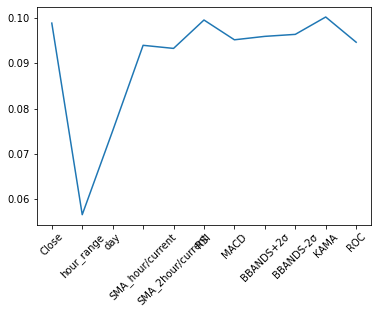

<Figure size 720x720 with 0 Axes>

[0.09891296 0.05651733 0.07507338 0.09400078 0.09331568 0.09960116
 0.09522221 0.09598118 0.0964229  0.10026623 0.09468618]


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')

    
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    
    
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame(columns=[ 
        "Close",
        "hour_range",
#         "January","February","March","April","May","June",
#         "July","August","September","October","November","December",
        "day",
#         "Sunday","Monday","Thuesday","Wednesday","Thursday","Friday","Saturday",
        "SMA_hour/current",
        "SMA_2hour/current",
        "RSI",
        "MACD",
        "BBANDS+2σ",
        "BBANDS-2σ"#,
#         "10m_rate",
#         "20m_rate",
#         "30m_rate",
#         "40m_rate",
#         "50m_rate",
#         "60m_rate",
#         "70m_rate",
#         "80m_rate",
#         "90m_rate",
#         "100m_rate",
#         "110m_rate",
#         "120m_rate",
#         "130m_rate",
#         "140m_rate",
#         "150m_rate",
#         "160m_rate",
#         "170m_rate",
#         "180m_rate",
#         "190m_rate",
#         "200m_rate",
#         "210m_rate",
#         "220m_rate",
#         "230m_rate",
#         "240m_rate",
#         "250m_rate",
#         "260m_rate",
#         "270m_rate",
#         "280m_rate",
#         "290m_rate",
#         "300m_rate"
        ])


    df_feature["Close"] = df["Close"]
    df_feature["hour_range"] = df["hour_range"]
    
#     df_feature["January"] = df["January"]
#     df_feature["February"] = df["February"]
#     df_feature["March"] = df["March"]
#     df_feature["April"] = df["April"]
#     df_feature["May"] = df["May"]
#     df_feature["June"] = df["June"]
#     df_feature["July"] = df["July"]
#     df_feature["August"] = df["August"]
#     df_feature["September"] = df["September"]
#     df_feature["October"] = df["October"]
#     df_feature["November"] = df["November"]
#     df_feature["December"] = df["December"]
    
    #print(df_feature.isnull().any())
    
    #print(df_feature.isnull().any())
    
#     days=["Sunday","Monday","Thuesday","Wednesday","Thursday","Friday","Saturday"]
#     for i in days:
#         df_feature[i] = df[i]

#     df_feature["Sunday"] = df["Sunday"]
#     df_feature["Monday"] = df["Monday"]
#     df_feature["Thuesday"] = df["Thuesday"]
#     df_feature["Wednesday"] = df["Wednesday"]
#     df_feature["Thursday"] = df["Thursday"]
#     df_feature["Friday"] = df["Friday"]
#     df_feature["Saturday"] = df["Saturday"]
    
    
    
    df_feature["day"] = df["day"]
    
#     i = 10
#     while i != 300 + 10:
#         df_feature[str(i)+"m_rate"] = df["Close"].pct_change(int(i/10))*100
#         i += 10
#     df_feature["10m_rate"] = df["Close"].pct_change()*100
#     df_feature["30m_rate"] = df["Close"].pct_change(3)*100
#     df_feature["60m_rate"] = df["Close"].pct_change(6)*100
#     df_feature["120m_rate"] = df["Close"].pct_change(12)*100

    
    
    
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる

    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA_hour/current"]= ta.SMA(close, timeperiod=6) / close
    df_feature["SMA_2hour/current"]= ta.SMA(close, timeperiod=12) / close

    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)

    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)

    #ボリンジャーバンド 
    upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
    df_feature["BBANDS+2σ"] = upper / close
    df_feature["BBANDS-2σ"] = lower / close

#     #WMA
#     df_feature["WMA"] = ta.WMA(close)
    
#     #EMA
#     df_feature["EMA"] = ta.EMA(close)
    
#     #DEMA
#     df_feature["DEMA"] = ta.DEMA(close)
    
#     #TEMA
#     df_feature["TEMA"] = ta.T3(close)
    
#     #TMA
#     df_feature["TMA"] = ta.TRIMA(close)
    
    #KAMA
    df_feature["KAMA"] = ta.KAMA(close)
    
#     #HT_TRENDLINE
#     df_feature["HT_TRENDLINE"] = ta.HT_TRENDLINE(close)
    
#     #MIDPOINT
#     df_feature["MIDPOINT"] = ta.MIDPOINT(close)
    
    #ROC
    df_feature["ROC"] = ta.ROCP(close)
    
    
    
    
    
#     c=[0,0,0,0]
    
    
#     def classify(x):
#         percent = 0.06

#         if x<-percent:
#             c[0]+=1
#             return 0
#         elif -percent<x<=0:
#             c[1]+=1
#             return 1
#         elif 0<x<percent:
#             c[2]+=1
#             return 2
#         elif percent<x:
#             c[3]+=1
#             return 3
       
    
#     c=[0,0,0]
    
    
#     def classify(x):
#         percent = 0.06

#         if x<-percent:
#             c[0]+=1
#             return 0
#         elif -percent<x<=percent:
#             c[1]+=1
#             return 1
#         elif percent<x:
#             c[2]+=1
#             return 2
       
    
    
    c=[0,0]
    
    
    def classify(x):
        #percent = 0.06

        if x<0:
            c[0]+=1
            return 0
        elif 0<=x:
            c[1]+=1
            return 1

        
        
    legs = 60
    
    classified = pd.DataFrame(columns=["class"])
    classified["class"] = (df["Close"].pct_change(int(legs/10))*100).apply(lambda x: classify(x))

    #classified = classified.shift(-1)
    classified = classified.shift(-int(legs/10))
    
    
    #df_adjusted=df_feature[30:len(df_feature)-2]
    #classified=classified[30:len(classified)-2]
    df_adjusted=df_feature[70:len(df_feature)-int(legs/10)]
    classified=classified[70:len(classified)-int(legs/10)]
    
    #print(df_adjusted)
    
    print(c)
    
    print(classified.isnull().sum())
    
    
    return df_adjusted, classified

#adjust_data("./2010_1to2019_12.csv")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./2010_1to2020_9EUR_USD.csv")

X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.8)


#y_ravel=np.ravel(y_train)
#print(X_train.isnull().any())
#print(X_train, y_train)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))

#X_real, y_real = adjust_data("./USD_JPY_202009_M10.csv")
#print(accuracy_score(y_real, clf.predict(X_real)))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))

from sklearn.metrics import precision_score
print(precision_score(y_test, clf.predict(X_test), average=None))

import pickle
filename = 'RF_EUR_USD.sav'
pickle.dump(clf, open(filename, 'wb'))

# print(X_train)
plt.plot(df_adjusted.columns.values, clf.feature_importances_)
plt.xticks(rotation=45)
plt.figure(figsize=(10,10))
plt.show()
print(clf.feature_importances_)